# Метод главных компонент

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("data/df_stand.csv")
df.drop(columns =['Unnamed: 0'], axis = 1, inplace = True)
df.head()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,-1.188889,0.747809,0.000875,-2.188080,0.635993,-0.033538,-0.971213,-1.067467,1.103742,0.030743,-0.993017,-1.138008,0.229337
1,-1.188889,0.747809,0.000875,0.651525,-0.412787,0.348870,-0.971213,-1.067467,1.103742,0.030743,-0.993017,-0.747039,-0.868324
2,-0.182517,0.747809,0.044431,0.035439,0.014216,-0.033538,-0.971213,-1.067467,1.103742,0.030743,-0.993017,-0.747039,-0.023969
3,-0.186274,0.336444,0.029163,0.035439,0.014216,-0.033538,-0.971213,-1.067467,1.103742,0.030743,-0.993017,-0.747039,0.229337
4,-0.404568,-0.897652,0.209333,0.035439,0.014216,-0.033538,-0.971213,-1.067467,1.103742,0.030743,-0.993017,-0.747039,1.073692


In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
df_new = df
df_new.drop(['Соотношение матрица-наполнитель', 'модуль упругости, ГПа', 'Модуль упругости при растяжении, ГПа', 'Прочность при растяжении, МПа', 'Угол нашивки, град'], axis=1, inplace=True)
df = df_new.dropna()
df.head()

,"Плотность, кг/м3","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Потребление смолы, г/м2",Шаг нашивки,Плотность нашивки
0,0.747809,-2.188080,0.635993,-0.033538,-0.971213,0.030743,-1.138008,0.229337
1,0.747809,0.651525,-0.412787,0.348870,-0.971213,0.030743,-0.747039,-0.868324
2,0.747809,0.035439,0.014216,-0.033538,-0.971213,0.030743,-0.747039,-0.023969
3,0.336444,0.035439,0.014216,-0.033538,-0.971213,0.030743,-0.747039,0.229337
4,-0.897652,0.035439,0.014216,-0.033538,-0.971213,0.030743,-0.747039,1.073692


## Оставили 8 признаков

In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 4)
XPCAreduced = pca.fit_transform(df) #???


#  n_components указывает на количество измерений, на которые будет производиться проекция, то есть до скольки измерений мы
#хотим снизить наш датасет. Другими словами – это n айгенвекторов с самыми большими собственными числами

In [6]:
XPCAreduced

array([[ 2.04212134, -0.42879429, -0.82096903,  0.90236238],
       [ 0.09364065,  0.11411842, -0.62031547, -0.56264297],
       [ 0.7914125 ,  0.19696935, -0.73414149, -0.02471576],
       ...,
       [ 0.59674888,  0.47136453,  0.09108579,  0.72731369],
       [ 0.18571039,  1.45270694,  0.84611987, -0.90644247],
       [-0.78263437,  0.29408399, -0.13863566,  1.14983739]])

In [7]:
df = pd.DataFrame(XPCAreduced)

In [8]:
df

,0,1,2,3
0,2.042121,-0.428794,-0.820969,0.902362
1,0.093641,0.114118,-0.620315,-0.562643
2,0.791413,0.196969,-0.734141,-0.024716
3,0.701704,0.121923,-0.896531,-0.144057
4,0.455715,-0.054330,-1.404543,-0.497881
...,...,...,...,...
994,0.132775,-1.076635,0.407339,-1.366763
995,0.355150,0.215422,1.446986,-1.312468
996,0.596749,0.471365,0.091086,0.727314
997,0.185710,1.452707,0.846120,-0.906442


In [9]:
type(df)

pandas.core.frame.DataFrame

In [10]:
df.columns

RangeIndex(start=0, stop=4, step=1)

In [11]:
df.index

RangeIndex(start=0, stop=999, step=1)

In [12]:
df.values

array([[ 2.04212134, -0.42879429, -0.82096903,  0.90236238],
       [ 0.09364065,  0.11411842, -0.62031547, -0.56264297],
       [ 0.7914125 ,  0.19696935, -0.73414149, -0.02471576],
       ...,
       [ 0.59674888,  0.47136453,  0.09108579,  0.72731369],
       [ 0.18571039,  1.45270694,  0.84611987, -0.90644247],
       [-0.78263437,  0.29408399, -0.13863566,  1.14983739]])

In [13]:
#df.rename(columns = {df[0] : 'one', df[1] : 'two', df[2] : 'three', df[3] : 'four'}, inplace = True) 
#df.head()


<AxesSubplot:>

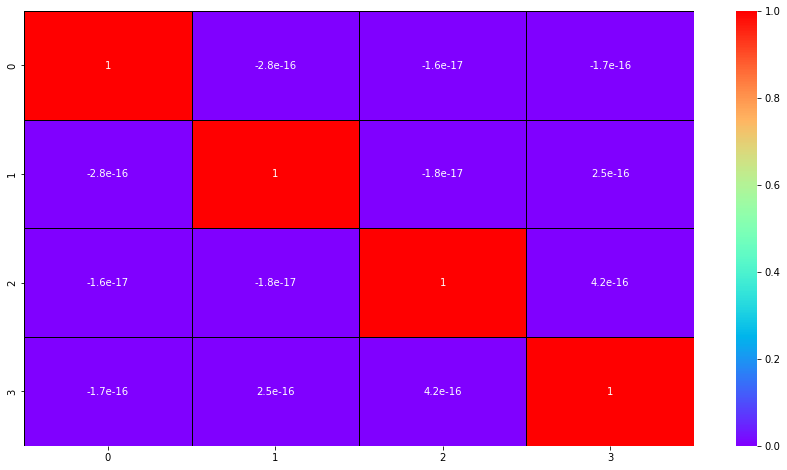

In [14]:
corrmat = df.corr()

f, ax = plt.subplots(figsize = (15, 8))
sns.heatmap(corrmat, ax = ax, cmap = 'rainbow', annot = True, linewidths = 1, linecolor = 'black')

Wall time: 2.09 s


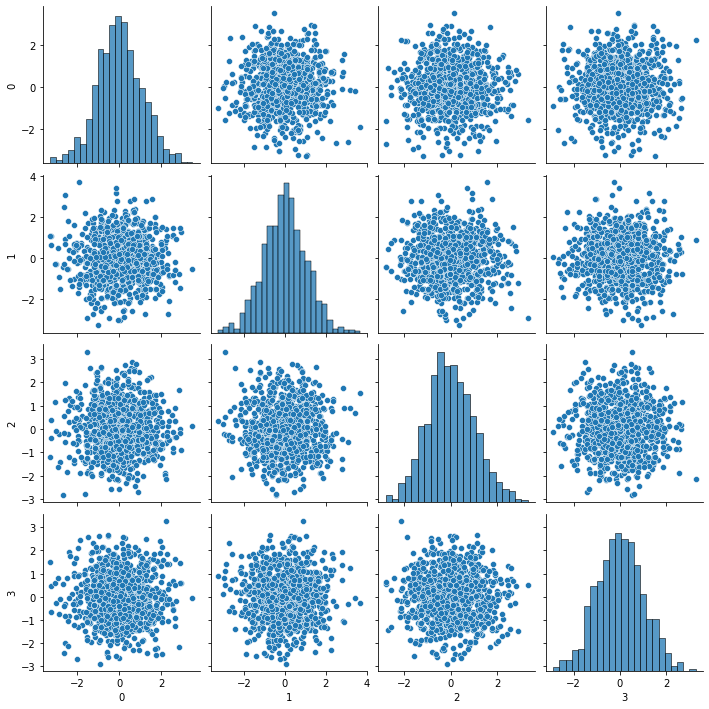

In [15]:
%%time
sns.pairplot(df, height = 2.5);

In [16]:
df

,0,1,2,3
0,2.042121,-0.428794,-0.820969,0.902362
1,0.093641,0.114118,-0.620315,-0.562643
2,0.791413,0.196969,-0.734141,-0.024716
3,0.701704,0.121923,-0.896531,-0.144057
4,0.455715,-0.054330,-1.404543,-0.497881
...,...,...,...,...
994,0.132775,-1.076635,0.407339,-1.366763
995,0.355150,0.215422,1.446986,-1.312468
996,0.596749,0.471365,0.091086,0.727314
997,0.185710,1.452707,0.846120,-0.906442


In [17]:
df_PCA = df

In [18]:
df_PCA

,0,1,2,3
0,2.042121,-0.428794,-0.820969,0.902362
1,0.093641,0.114118,-0.620315,-0.562643
2,0.791413,0.196969,-0.734141,-0.024716
3,0.701704,0.121923,-0.896531,-0.144057
4,0.455715,-0.054330,-1.404543,-0.497881
...,...,...,...,...
994,0.132775,-1.076635,0.407339,-1.366763
995,0.355150,0.215422,1.446986,-1.312468
996,0.596749,0.471365,0.091086,0.727314
997,0.185710,1.452707,0.846120,-0.906442


In [19]:
df_PCA.to_csv('data/df_PCA.csv')

# НИЧЕМ НЕ ОТЛИЧАЕТСЯ ОТ ИСХОДНИКА- корреляций НОЛЬ)

In [25]:
my_model = PCA(n_components=4)
my_model.fit_transform(df)

array([[ 2.04212134, -0.42879429, -0.82096903,  0.90236238],
       [ 0.09364065,  0.11411842, -0.62031547, -0.56264297],
       [ 0.7914125 ,  0.19696935, -0.73414149, -0.02471576],
       ...,
       [ 0.59674888,  0.47136453,  0.09108579,  0.72731369],
       [ 0.18571039,  1.45270694,  0.84611987, -0.90644247],
       [-0.78263437,  0.29408399, -0.13863566,  1.14983739]])

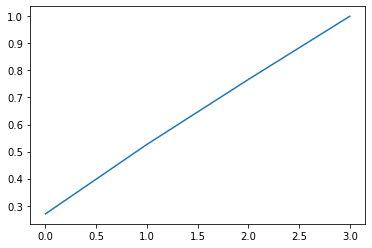

In [26]:
plt.plot(my_model.explained_variance_ratio_.cumsum())

# ПОТЕРИ ДАННЫХ НЕТ?

---

Пример

In [27]:
import numpy as np
from sklearn.decomposition import PCA

np.random.seed(0)
my_matrix = np.random.randn(20, 5)

my_model = PCA(n_components=5)
my_model.fit_transform(my_matrix)

print(my_model.explained_variance_)
print( my_model.explained_variance_ratio_)
print(my_model.explained_variance_ratio_.cumsum())

[1.58691121 1.36183634 1.02149516 0.64960702 0.33188507]
[0.32047581 0.27502207 0.20629036 0.13118776 0.067024  ]
[0.32047581 0.59549787 0.80178824 0.932976   1.        ]


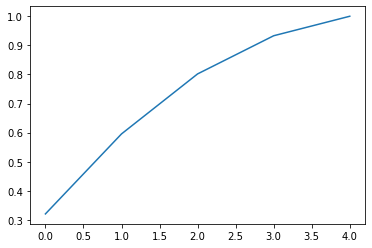

In [28]:
plt.plot(my_model.explained_variance_ratio_.cumsum())